In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

View first five element in y_train and y_test which is in 2 dimension and it needs to be converted into a 1 dimension for better prediction and accuracy

In [ ]:
y_train.reshape(-1)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
y_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

Normalizing the data is by dividing x_train and x_test by 255 

In [ ]:
x_train = x_train / 255

In [ ]:
x_test = x_test/255

In [ ]:
Moh_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
Moh_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = Moh_model.fit(x_train, y_train,validation_split=0.1, epochs=10 , batch_size=16)

Epoch 1/10
2813/2813 [==============================] - 77s 27ms/step - loss: 1.4649 - accuracy: 0.4716 - val_loss: 1.1696 - val_accuracy: 0.5918
Epoch 2/10
2813/2813 [==============================] - 72s 26ms/step - loss: 1.1115 - accuracy: 0.6106 - val_loss: 1.0537 - val_accuracy: 0.6348
Epoch 3/10
2813/2813 [==============================] - 73s 26ms/step - loss: 0.9785 - accuracy: 0.6611 - val_loss: 0.9729 - val_accuracy: 0.6642
Epoch 4/10
2813/2813 [==============================] - 71s 25ms/step - loss: 0.8884 - accuracy: 0.6908 - val_loss: 0.8922 - val_accuracy: 0.7006
Epoch 5/10
2813/2813 [==============================] - 73s 26ms/step - loss: 0.8222 - accuracy: 0.7133 - val_loss: 0.8945 - val_accuracy: 0.6932
Epoch 6/10
2813/2813 [==============================] - 72s 26ms/step - loss: 0.7621 - accuracy: 0.7337 - val_loss: 0.8498 - val_accuracy: 0.7142
Epoch 7/10
2813/2813 [==============================] - 72s 26ms/step - loss: 0.7091 - accuracy: 0.7521 - val_loss: 0.8884 -

In [1]:
Moh_model.evaluate(x_test,y_test)

NameError: ignored

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

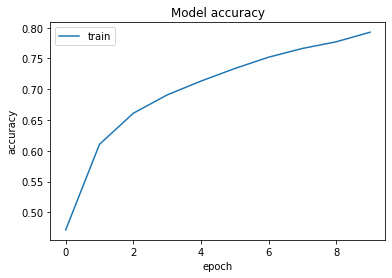

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc= 'upper left')
plt.show()

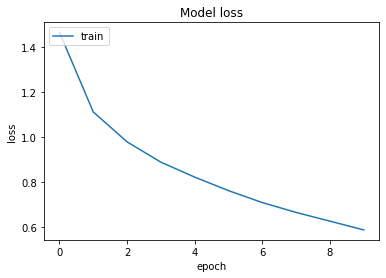

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc= 'upper left')
plt.show()